## Implementation of ANN in keras 

In [13]:
!pip install tensorflow

In [14]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os

In [15]:
print(tf.__version__)

2.13.0


In [16]:
import keras
print(keras.__version__)

2.13.1


In [17]:
os.getcwd()

'/home/jovyan/work'

## Creating simple clssifier using keras on MNIST data

In [18]:
mn=tf.keras.datasets.mnist

In [19]:
(X_train_full,y_train_full),(X_test,y_test)=mn.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [20]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [21]:
X_train_full.shape

(60000, 28, 28)

In [22]:
X_test.shape

(10000, 28, 28)

In [23]:
X_train_full[0].shape

(28, 28)

In [24]:
# create a validation data 
# scale data between 0 and 1 by deviding it by 255, as its an unsigned data b/w 0-255 range
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

X_test=X_test/255.

In [25]:
len(X_train_full[5000:])

55000

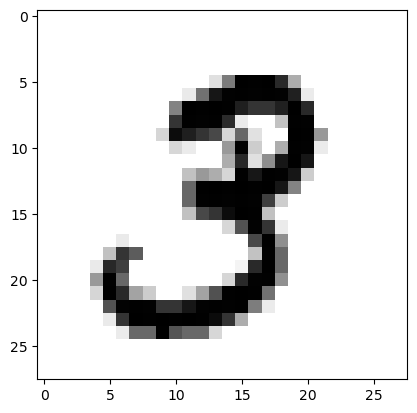

In [26]:
plt.imshow(X_train[1],cmap='binary')
plt.show()

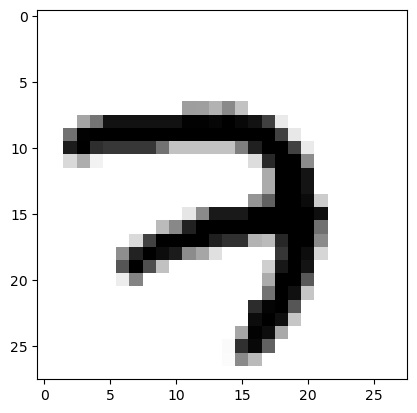

In [27]:
plt.imshow(X_train[0],cmap='binary')
plt.show()

<AxesSubplot: >

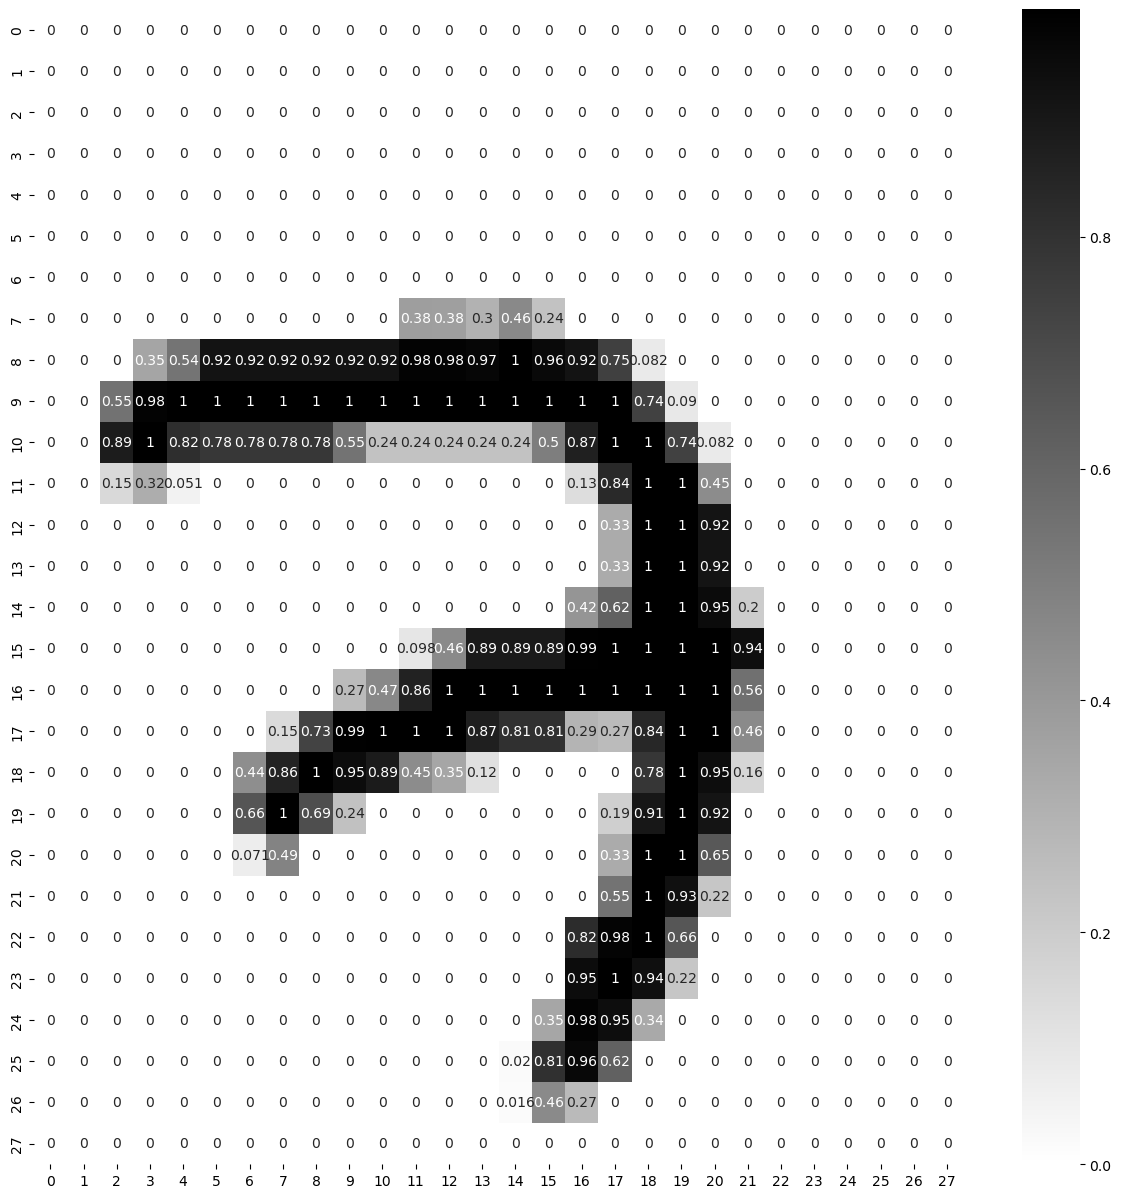

In [28]:
plt.figure(figsize=(15,15))
sb.heatmap(X_train[0],annot=True,cmap='binary')

In [29]:
## Creating layers
Layers=[tf.keras.layers.Flatten(input_shape=[28,28],name='inputlayer'),
        tf.keras.layers.Dense(300,activation='relu',name='hidenlayer1'),
        tf.keras.layers.Dense(100,activation='relu',name='hidenlayer2'),
        tf.keras.layers.Dense(10,activation='softmax',name='outputlayer')
       ]

In [30]:
model_clf=tf.keras.models.Sequential(Layers)

In [31]:
model_clf.layers

In [32]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hidenlayer1 (Dense)         (None, 300)               235500    
                                                                 
 hidenlayer2 (Dense)         (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
hidden1=model_clf.layers[1]
hidden1.name

'hidenlayer1'

In [34]:
hidden1.get_weights()[0].shape

(784, 300)

In [35]:
hidden1.get_weights()[1].shape

(300,)

In [36]:
weights,biases=hidden1.get_weights()

In [37]:
weights.shape

(784, 300)

In [38]:
print('shape\n',weights.shape,'\n')
weights

shape
 (784, 300) 



array([[ 0.02674093, -0.00988454, -0.07385821, ...,  0.03734879,
        -0.00964931,  0.0600985 ],
       [-0.00939487, -0.03006446,  0.05419651, ...,  0.01778218,
        -0.05652172, -0.05937394],
       [-0.05276096, -0.02231131, -0.0208603 , ...,  0.07012373,
        -0.01280813, -0.00162048],
       ...,
       [-0.02752764, -0.0509177 ,  0.00819941, ..., -0.02521484,
        -0.03556814, -0.04025548],
       [-0.05200192, -0.01698999, -0.03983659, ...,  0.00604756,
         0.03152554,  0.02319909],
       [-0.05092444,  0.04772886,  0.04112232, ..., -0.05095081,
        -0.05276   , -0.00575815]], dtype=float32)

In [39]:
print('shape\n',biases.shape,'\n')
biases

shape
 (300,) 



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [40]:
loss_Function='sparse_categorical_crossentropy'
Optimizer='SGD'
Metrics=['accuracy']

In [41]:
model_clf.compile(loss=loss_Function,
                 optimizer=Optimizer,
                 metrics=Metrics)

In [42]:
#training 
history=model_clf.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid),batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5927 - accuracy: 0.8491 - val_loss: 0.3013 - val_accuracy: 0.9166
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2850 - accuracy: 0.9190 - val_loss: 0.2346 - val_accuracy: 0.9362
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2329 - accuracy: 0.9335 - val_loss: 0.1998 - val_accuracy: 0.9436
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1985 - accuracy: 0.9432 - val_loss: 0.1813 - val_accuracy: 0.9504
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1726 - accuracy: 0.9504 - val_loss: 0.1629 - val_accuracy: 0.9530
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1526 - accuracy: 0.9567 - val_loss: 0.1447 - val_accuracy: 0.9600
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1367 - accuracy: 0.9604 - val_loss: 0.1297 - val_accuracy:

In [43]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [44]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.592706,0.849073,0.301324,0.9166
1,0.285046,0.919000,0.234640,0.9362
2,0.232937,0.933509,0.199806,0.9436
3,0.198471,0.943164,0.181303,0.9504
4,0.172614,0.950382,0.162890,0.9530
5,0.152613,0.956655,0.144683,0.9600
6,0.136682,0.960436,0.129691,0.9638
7,0.123274,0.964673,0.120637,0.9660
8,0.111776,0.968273,0.114482,0.9682
9,0.102661,0.971364,0.106671,0.9696


<AxesSubplot: >

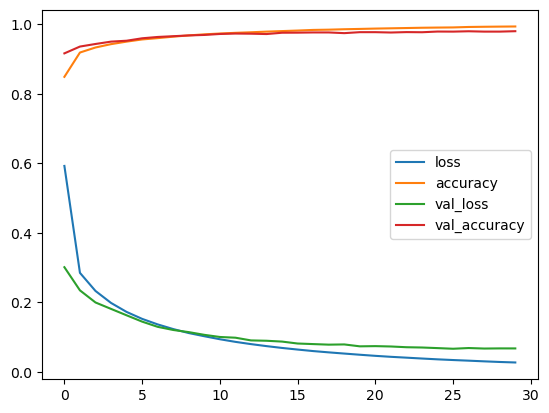

In [45]:
pd.DataFrame(history.history).plot()

In [46]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0693 - accuracy: 0.9787


[0.06929479539394379, 0.9786999821662903]

In [47]:
X_new=X_test[:3]

In [48]:
actual=y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<AxesSubplot: >

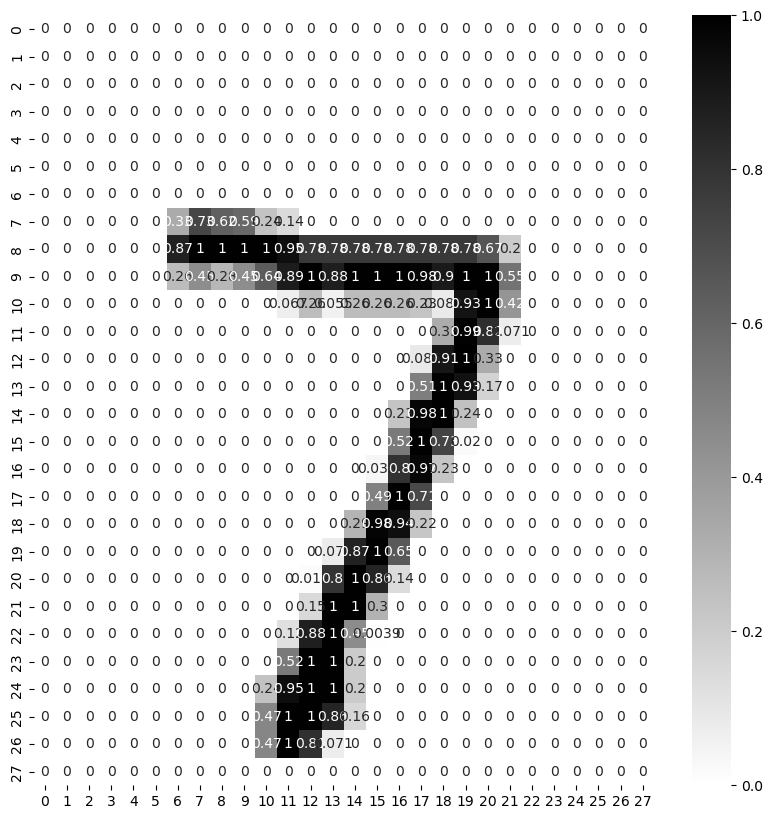

In [49]:
plt.figure(figsize=(10,10))
sb.heatmap(X_test[0],annot=True,cmap='binary')

<AxesSubplot: >

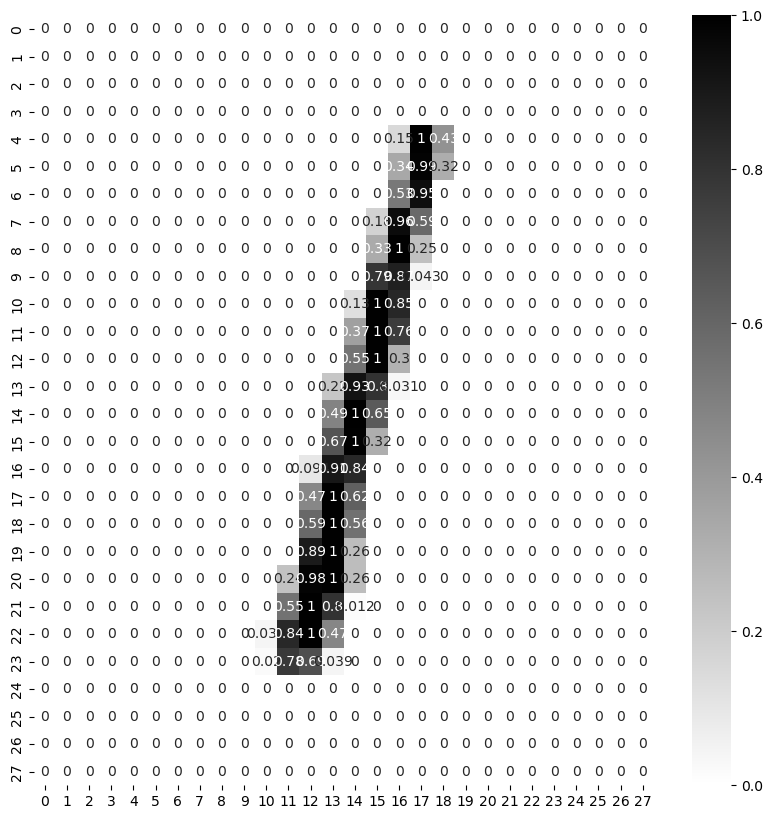

In [50]:
plt.figure(figsize=(10,10))
sb.heatmap(X_test[2],annot=True,cmap='binary')

In [51]:
y_prob=model_clf.predict(X_new)

1/1 [==============================] - 0s 134ms/step


In [52]:
y_prob.round()

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [53]:
y_prob

array([[1.4974685e-06, 4.4731885e-07, 2.6179416e-05, 3.0286211e-04,
        4.1433225e-08, 1.9268848e-06, 3.6029974e-11, 9.9961191e-01,
        8.1210255e-06, 4.6892794e-05],
       [1.0264080e-07, 8.2126744e-06, 9.9996686e-01, 2.3149332e-05,
        2.3740836e-12, 6.6237916e-08, 9.1541708e-08, 4.5794264e-14,
        1.3909496e-06, 7.5408045e-13],
       [7.4157992e-06, 9.9758101e-01, 5.2977458e-04, 1.3482719e-04,
        2.5115011e-04, 1.3821708e-06, 2.7438682e-05, 1.0994403e-03,
        3.5278095e-04, 1.4630558e-05]], dtype=float32)

In [54]:
y_pred=np.argmax(y_prob,axis=-1)

In [55]:
y_pred

array([7, 2, 1])

## Tensorboard callback function

In [56]:
log_folder='logs'
%load_ext tensorboard

!rm -rf ./logs/

tb_sb=tf.keras.callbacks.TensorBoard(log_dir=log_folder,histogram_freq=1)

In [57]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.05)

In [58]:
CKPT_path='model_ckpt.h5'
checkpointinf_cb=tf.keras.callbacks.ModelCheckpoint(CKPT_path,save_best_only=True)

In [ ]:
history=model_clf.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),batch_size=32,callbacks=[tb_sb,early_stopping_cb,checkpointinf_cb])

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0256 - accuracy: 0.9943 - val_loss: 0.0654 - val_accuracy: 0.9802
Epoch 2/10
  50/1719 [..............................] - ETA: 5s - loss: 0.0212 - accuracy: 0.9975

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1719/1719 [==============================] - 6s 3ms/step - loss: 0.0244 - accuracy: 0.9945 - val_loss: 0.0662 - val_accuracy: 0.9796
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0230 - accuracy: 0.9952 - val_loss: 0.0653 - val_accuracy: 0.9802
Epoch 4/10
1133/1719 [==================>...........] - ETA: 1s - loss: 0.0216 - accuracy: 0.9959

In [ ]:
%tensorboard --logdir={log_folder}

In [ ]:
ckpt_model=tf.keras.models.load_model(CKPT_path)

In [ ]:
history=ckpt_model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),batch_size=32,callbacks=[tb_sb,early_stopping_cb,checkpointinf_cb])

In [ ]:
ckpt_model.predict(X_test)

## regularization

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout

In [ ]:
model=Sequential()
model.add(Flatten(input_shape=[28,28],name='inputlayer'))
model.add(Dense(units=64,activation='relu',kernel_regularizer=regularizer.L2(1e-4)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation='relu',kernel_regularizer=regularizer.L1L2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.2))
model.add(Dense(units=10,activation='softmax'))

In [ ]:
model.summary()